<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span></span></li></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Кодирование-признаков" data-toc-modified-id="Кодирование-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Кодирование признаков</a></span></li><li><span><a href="#Попытка-заполнить-пропуски-в-Tenure-регрессионной-моделью" data-toc-modified-id="Попытка-заполнить-пропуски-в-Tenure-регрессионной-моделью-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Попытка заполнить пропуски в Tenure регрессионной моделью</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#масштабирование" data-toc-modified-id="масштабирование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>масштабирование</a></span></li><li><span><a href="#поиск-лучшей-модели" data-toc-modified-id="поиск-лучшей-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>поиск лучшей модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#валидация-на-сбалансированных-данных" data-toc-modified-id="валидация-на-сбалансированных-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>валидация на сбалансированных данных</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle


In [117]:
df = pd.read_csv('/datasets/Churn.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [119]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3575,3576,15625151,Wan,640,France,Female,66,9.0,116037.76,1,0,1,184636.05,0
8789,8790,15619116,Wallace,493,France,Female,36,2.0,0.00,2,0,1,99770.30,0
2373,2374,15671789,Woods,616,France,Male,31,NaN,94263.91,2,1,0,168895.06,0
7419,7420,15622507,Hamilton,748,Germany,Female,40,3.0,103499.09,2,0,0,38153.19,0
5900,5901,15569759,Rawling,583,France,Female,27,4.0,0.00,3,1,0,163113.41,0


In [120]:
df.describe().round(3)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,1.000000e+04,10000.000,10000.000,9091.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,1.569094e+07,650.529,38.922,4.998,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,7.193619e+04,96.653,10.488,2.895,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,1.556570e+07,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,1.562853e+07,584.000,32.000,2.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,1.569074e+07,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,1.575323e+07,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.248,0.000
max,10000.000,1.581569e+07,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<AxesSubplot:>

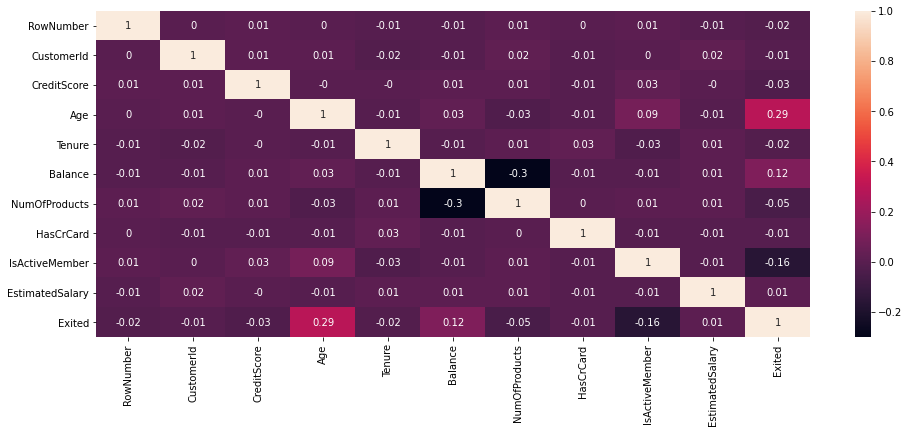

In [121]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr().round(2), annot=True)

наиболее колерирующим с целевым признаком является Возраст.
Рассмотрю по ближе распределение возраста на целевом признаке 

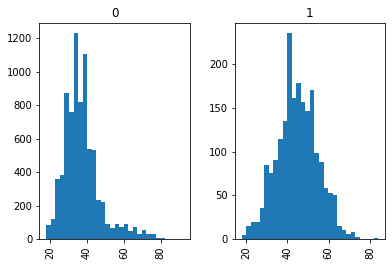

In [122]:
df.hist(column='Age', by='Exited',bins=30, grid=True);

до 50 лет люди активнее перестают быть клиентами банка

In [123]:
# удалю колонку с ID и фамилиями - они не дложны влиять на целефой признак никак
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [124]:
# посмотрим сколько категорий у нас в признаке География
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Кодирование признаков

закодируем номинальные признаки методом one hot encoder - переменных получается не много

для того что бы избежать dummie ловушки отбросим первый скодированный столбец - тем самым избежим мультиколлениарности и информация из него восстановима по информации из следующих столбцов.

In [125]:
data = pd.get_dummies(df, drop_first=True)

### Попытка заполнить пропуски в Tenure регрессионной моделью

идея - заполнить пропуски в столбце Tenure , сделав его целевым признаком.

отделим данные с пропусками в тестовый фрейм

In [126]:
data_test = data[data['Tenure'].isna()]
data_temp = data[~data['Tenure'].isna()]

In [127]:
# выделим целевой пизнак 
target = data_temp['Tenure']
features = data_temp.drop('Tenure', axis=1)
target_test = data_test['Tenure']
features_test = data_test.drop('Tenure', axis=1)

In [128]:
# разделим данные на обучающие и валидационные
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)


Перед моделированием необходимо масштабировать данные

Различные масштабы признаков отрицательно влияют на моделирование набора данных. Это приводит к предвзятому результату прогнозов с точки зрения ошибок классификации и показателей точности.

Будем использовать метод масштабирования - стандартизацию. (StandardScaler)


In [129]:
# выберем числовые признаки
numeric = ['CreditScore','Age','Balance','EstimatedSalary']
# создадим объект класса с функцией стандартизции
scaler = StandardScaler()
# настроим его на обучающих данных. Настройка — это вычисление среднего и дисперсии
scaler.fit(features_train[numeric])

StandardScaler()

In [130]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_37/4140061603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_37/4140061603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [131]:
model = LinearRegression()

In [132]:
model.fit(features_train, target_train)

LinearRegression()

In [133]:
# создадим константную модель с которой будем сравнивать нашу модель
const_model = pd.Series(target_valid.mean(), index=target_valid.index)

# посмотрим сразу на среднеквадратичную ошибку (Mean Squared Error) 
# – cреднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями модели 
mse = mean_squared_error(target_valid, const_model)
mse

8.196555172728152

Среднеквадратическая ошибка — это одна из метрик ошибок для оценки точности и частоты ошибок любого алгоритма машинного обучения для задачи регрессии.

MSE — это функция риска, которая помогает нам определить среднеквадратичную разницу между прогнозируемым и фактическим значением признака или переменной.


In [134]:
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
mse

8.216030572895233

посмотрим коэффициент детерминации(метрика R2) - долю средней квадратичной ошибки модели от MSE среднего, с вычетом из единицы. Увеличение метрики означает прирост качества модели.

In [135]:
r2_score(target_valid, predicted_valid)

-0.002376046980307356

Когда R² отрицательно, это означает, что модель хуже, чем предсказание среднего значения

r2 меньше 0 качество модели очень низкое

Создадим константную модель с медианным значением для получения средней абсолютной ошибки

In [136]:
median_model = pd.Series(target_valid.median(), index=target_valid.index)

In [137]:
mean_absolute_error(target_valid, median_model)

2.445666520017598

получается модель ошибается в предсказании искомого признака (который измряется в годах) среднем на 2 года и 4 месяца.

пропуски заполню средним значением

In [138]:
data['Tenure'] = data.groupby(['Geography_Germany','Geography_Spain','Gender_Male'])['Tenure'].transform(lambda x: x.fillna(x.median()))

## Исследование задачи

Выделим целевой признак  

In [139]:
target = data['Exited']
features = data.drop('Exited', axis=1)

и разобъём данные на три фрейма: тренировачные, валидационные и тестовые

In [140]:
features_t, features_test, target_t, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345) #  stratify=target ,

In [141]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_t, target_t, test_size=0.25, stratify=target_t , random_state=12345)

In [142]:
print(target_train.shape,target_valid.shape,target_test.shape)

(6000,) (2000,) (2000,)


### масштабирование

In [143]:
#Перед моделированием необходимо масштабировать данные

# выберем числовые признаки
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
# создадим объект класса с функцией стандартизции
scaler = StandardScaler()

In [144]:
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_37/2453302510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_37/2453302510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

### поиск лучшей модели

опробуем классификатор логистической регрессией

In [145]:
model_lr = LogisticRegression(random_state=12345)

In [146]:
model_lr.fit(features_train, target_train)

LogisticRegression(random_state=12345)

In [147]:
predicted_lr_valid = model_lr.predict(features_valid)
f1_score(target_valid, predicted_lr_valid)

0.3052064631956912

теперь попробуем случайный лес - с перебором некоторых гиперпараметров

In [148]:
#  словарь со списками гиперпараметров которые надо  перебрать в поисках лучшей модели
random_grid = {'max_depth': [10, 20, 30, 40],  
               'min_samples_leaf': [1, 2, 3, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [159]:
model_rf = RandomForestClassifier(random_state=12345) # создадим объект класса - случайный лес классификатор
# случайно переберем параметры с использованием 3-кратной перекрестной валидации
# переберем 100 различных комбинаций

rf_random = RandomizedSearchCV(estimator = model_rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=12345, 
                               n_jobs = -1,
                               scoring='f1')

In [160]:
# обучим модель
rf_random.fit(features_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=180; total time=   0.8s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=180; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=180; total time=   0.8s
[CV] END max_depth=10,

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=12345, scoring='f1', verbose=2)

In [161]:
rf_random.best_score_

0.5854623863908529

In [162]:
# посмотрим на параметры показавшие наиболешую оценку
rf_random.best_params_

{'n_estimators': 180,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

{'n_estimators': 230,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 40}

In [163]:
rf_best = rf_random.best_estimator_
predicted_rf_valid = rf_best.predict(features_valid)

f1_score(target_valid, predicted_rf_valid)

0.5740740740740741

Но f1 метрика лучше чем на логистической регрессии но еще низка - интересно изза чего

In [164]:
confusion_matrix(target_valid, predicted_rf_valid)

array([[1538,   60],
       [ 216,  186]])

In [165]:
precision_score(target_valid, predicted_rf_valid)

0.7560975609756098

In [166]:
recall_score(target_valid, predicted_rf_valid)

0.4626865671641791

получается что метрика полноты у нашей модели давольно низкая - очень много не выявленных положительных , то есть много ложнонегативных элементов показывает модель 

## Борьба с дисбалансом

In [167]:
data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Наблюдаем перекос в балансе классов - необходимо увеличить (up sampling) Exited==1 или уменьшить количество (down sampling) признака Exited класса=0

попробуем случайный андерсэмплинг и оверсэмплинг

In [168]:
# создам функции для выравнивания баланса классов "случайным" алгоритмом

def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = (len(target_zeros)//len(target_ones))
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


def downsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    fraction = round((len(target_ones)/len(target_zeros)),1)
        
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [169]:
features_upsampled, target_upsampled = upsample(features_train, target_train)

features_downsampled, target_downsampled = downsample(features_train, target_train)

In [170]:
target_upsampled.value_counts(normalize=True)

0    0.569392
1    0.430608
Name: Exited, dtype: float64

In [171]:
target_downsampled.value_counts(normalize=True)

0    0.543462
1    0.456538
Name: Exited, dtype: float64

мне кажется с таким балансом можно работать 

опробуем эти фреймы на полученной лучшей модели случайого леса

###  валидация на сбалансированных данных

In [172]:
rf_best_model = RandomForestClassifier(
    n_estimators=230,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=40,
    random_state=12345)

In [173]:
rf_best_model.fit(features_downsampled, target_downsampled)
predicted_rf_valid = rf_best_model.predict(features_valid)
f1_score(target_valid, predicted_rf_valid)

0.5971074380165289

In [174]:
rf_best_model.fit(features_upsampled, target_upsampled)
predicted_rf_valid = rf_best_model.predict(features_valid)
f1_score(target_valid, predicted_rf_valid)

0.601815823605707

модель натренировалась однозначно лучше 

f1-метрика позволяет принять во внимание как точность так и полноту 

Видим что используя балансировку метрика f1 значительно улучшилась.

А также баленсеровка 'случайным' апсемплингом лучше чем дуансемплингом, думаю это изза того что при этом алгоритме не уменьшается количество реальных данных

Для того что бы увидель на сколько сильно наша модель отлияччается от случайной нужно посчитать площадь под ROC-кривой
 или кривой ошибок - изображается на графике как линия по координатам заданным показателями TPR и FPR

Построить ROC-кривую поможет функция roc_curve() которой передаются фактическое значение y и вероятность предсказания положительного класса

In [175]:
probabilities_valid = rf_best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1] # отберем вероятность класса - 1

In [176]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

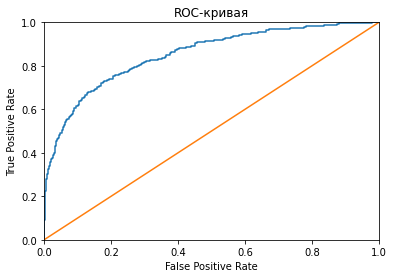

In [177]:
plt.figure()
plt.plot(fpr, tpr)

x = np.arange(0, 1.1, 0.1)
y = np.arange(0, 1.1, 0.1)
plt.plot(x, y)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [178]:
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
auc_roc

0.8514841312835074

AUC-ROC случайной модели равна 0.5. Получается наша модель предсказывает точнее случайной на 35 пунктов

Хочется посмотреть какие признаки оказали значительное влияние

In [108]:
feature_imp = pd.Series(rf_best_model.feature_importances_,index=features_valid.columns).sort_values(ascending=False)

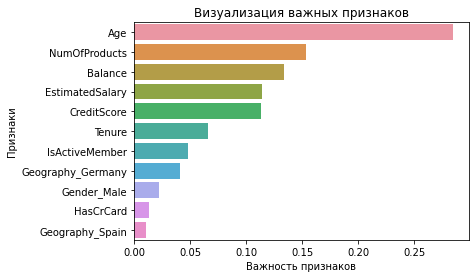

In [109]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

Как не странно - но признаки гендер и география малозначительно повлияли на принимаемые решения моделью.

## Тестирование модели

Посмотрим теперь так же ли покажет себя модель на тестовых данных.

In [179]:
predicted_rf_test = rf_best_model.predict(features_test)
f1_score(target_test, predicted_rf_test)

0.6203473945409429

на тестовых данных модель показала себя почти также как и на валидаци  и это хорошо

In [180]:
recall_score(target_test, predicted_rf_test)

0.585480093676815

Recall метрика(полнота) - показывает что еще нужно поработать над моделью для уменьшения количества ложнонегативного сробатывания

In [181]:
probabilities_test = rf_best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1] # отберем вероятность класса - 1

In [182]:
auc_roc = roc_auc_score(target_test,probabilities_one_test)
auc_roc

0.8600609524603563

AUC-ROC случайной модели равна 0.5. Получается наша модель предсказывает точнее случайной на 36 пунктов

ROC-AUC кривая наглядно показывает как будут меняться показатели точности и полноты от выбираемого порогового значения. Трудно определить оптимальную точку, но общее правило — максимизировать разницу (TPR-FPR), которая на графике представлена вертикальным расстоянием между оранжевой и синей линией.

Также можно  выбрать наиболее подходящее пороговое значение, учитывая сферу применения модели. 

Целью исследования является найти тех людей которые потенциально в скором времени могут расторгнуть договор. Думаю что тут нужно охватить максимально большее число таких людей поэтому можно поступиться метрикой точности и сосредоточиться на полноте, то есть порог probabilites склонить в сторону где больше определяется положительный класс.